# Tarea 1 Machine Learning - Métodos Lineales para Regresión

Juan Pablo Muñoz - 201373522-3 

Margarita Bugueño Pérez - 201373510-K

## House Sales in King County, USA

### El dataset y organización del presente

Se trabaja sobre el dataset 'House Sales in King County, USA' el cual contiene los precios de venta de casas para King County, el cual incluye Seattle.  
Los datos incluyen ventas realizadas entre mayo del 2014 y mayo del 2015.  
  
  El trabajo expuesto se organiza de la siguiente manera:  
  i. Regresión Lineal Ordinaria (LSS)  
  ii. Selección de Atributos  
  iii. Regularización  
  iv. Drift


#### Regresión Lineal Ordinaria (LSS) 

###### a. Construya un dataframe con los datos a analizar

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


En el dataset se informan 21 características diferentes de cada una de las casas registradas en él. Estas son:
  
  id: identificador numérico para una casa  
  date: fecha en que la casa fue vendida  
  price: variable objetivo (precio de venta de la casa)  
  bedrooms: #dormitorios  
  bathrooms: #baños  
  sqft_living: pies cuadrados construidos  
  sqft_lot: pies cuadrados del terreno  
  floors: #pisos  
  waterfront: 0 si no tiene vista a lago/mar, 1 en otro caso  
  view: 0 si no ha sido visitada, 1 en otro caso  
  condition: condición de la casa  
  grade: nota, basado en el sistema de calificación de King County  
  sqft_above: pies cuadrados de la casa sin incluir el sótano  
  sqft_basement: pies cuadrados del sótano  
  yr_built: año de construcción  
  yr_renovated: año de renovación/ampliación de la casa  
  zipcode: código postal  
  lat: latitud (ubicación de la casa)  
  long: longitud (ubicación de la casa)  
  sqft_living15: pies cuadrados construidos en el año 2015  
  sqft_lot15: pies cuadrados del terreno en el año 2015


###### b. Describa brevemente el dataset a utilizar

In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df.shape

(21613, 21)

Se informa que el dataset contiene 21613 registros diferentes, cada uno con 21 atributos.

Tres de los 21 atributos no representan información de valor cuando se propone evaluar el precio de una propiedad. Estos son: 'id', 'date', 'zipcode' y por ello, se procede a eliminarlos del dataframe.

In [4]:
df.drop(['id','date','zipcode'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [5]:
df.shape


(21613, 18)

Se observa que las dimensiones (atributos) pasan a ser 18 efectivamente. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


Se muestra el resumen del dataframe 'df', en el cual no existen registros nulos para ninguna de las 18 características.  
Además se informa el tipo de dato que presenta cada una de los atributos.

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


El método describe genera estadísticas descriptivas del dataframe en cuestión.  
Se informa el valor promedio, dispersión y la forma de la distribución de los datos según atributo (excluyendo los valores de NaN).  


###### ¿Cómo se observan los datos? [Gráfico]

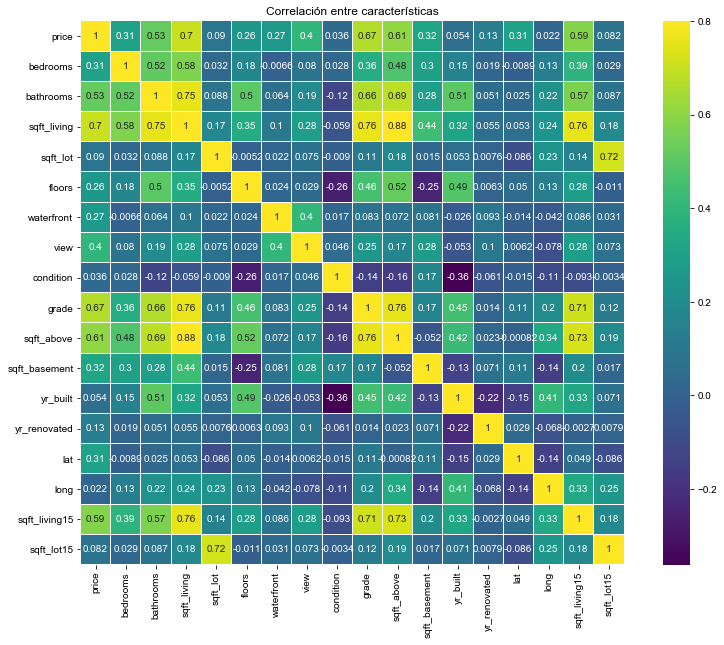

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlación entre características');
plt.show()

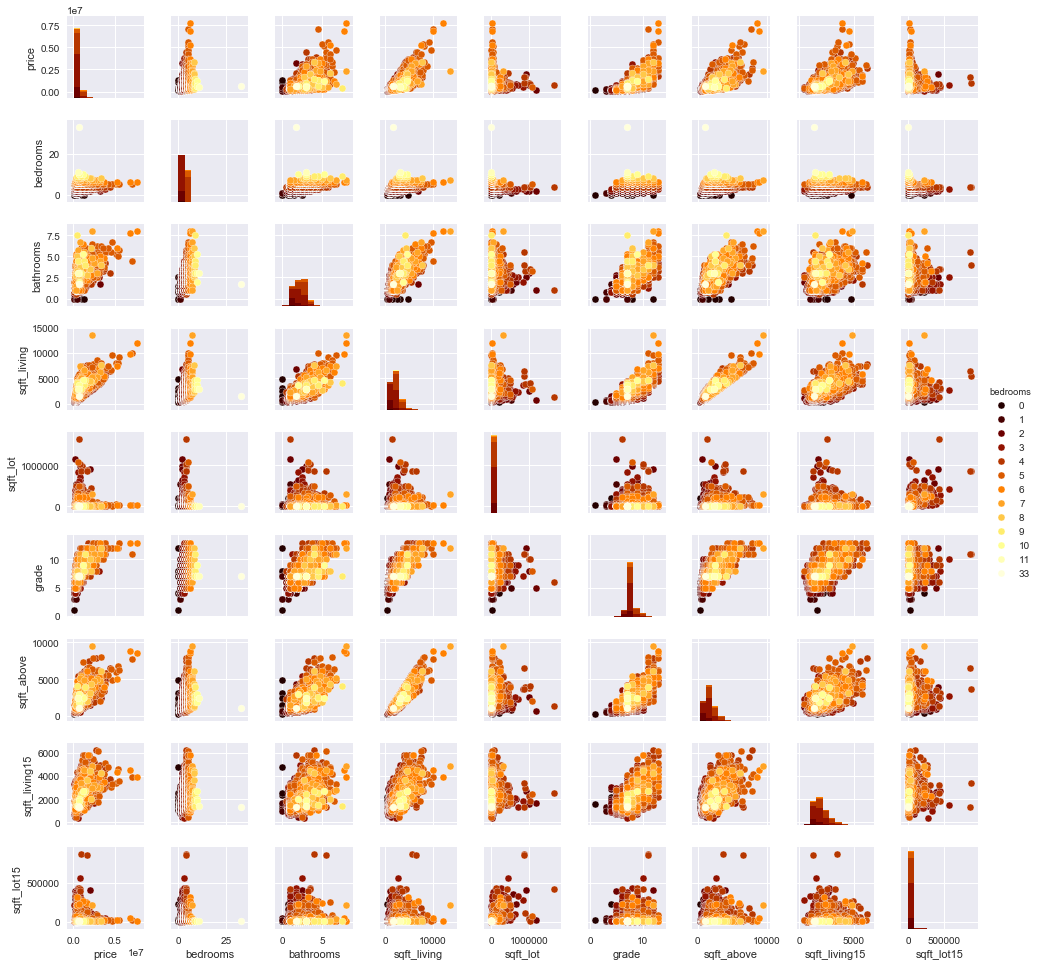

In [9]:
import matplotlib.pyplot as plt
plt.clf()
g = sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15','sqft_lot15']], hue='bedrooms', palette='afmhot',size=1.5)
plt.show()

Se observa claramente la correlación entre las características 

###### c. Normalización de los datos y transformación a la variable a predecir 

Antes de escalar, se graficará en un boxplot el precio de las casas:

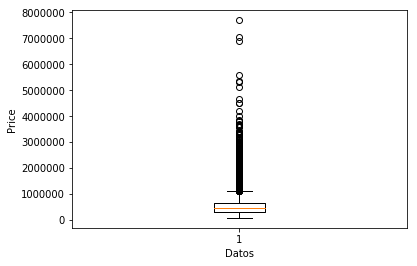

In [8]:
import matplotlib.pyplot as plt

plt.clf()

plt.boxplot(list(df['price']))
plt.xlabel('Datos')
plt.ylabel('Price')

plt.show()

Notar que la distribución de los precios está sesgada hacia aquellos bajos, quedando como outliers aquellas casas de un valor de 1 millón o más aproximadamente.

A continuación se realiza el escalado y estandarización de los datos:

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

StandardScaler hace que, para cada atributo, su media sea cero y su varianza unitaria. Con esto logra que el conjunto de datos se componga de atributos 'bien comportados' aptos para la aplicación efectiva de métodos de aprendizaje automático. Esto es porque dichos métodos y sus elementos se construyen asumiendo que los atributos son variables aleatorias distribuidas de forma normal, ya que así se satisfacen condiciones que benefician la simplicidad y eficiencia de los modelos sin pérdida de generalidad. El no aplicar un escalado y estandarización de los atributos provocaría, con alta probabilidad, un peor desempeño de aprendizaje y predicción.

Al graficar los precios ahora escalados junto a su estado anterior, se obtiene:

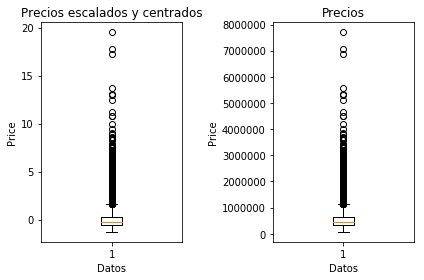

In [10]:
import matplotlib.pyplot as plt
plt.clf()

plt.subplot(1,2,1)
plt.boxplot(list(df_scaled['price']))
plt.xlabel('Datos')
plt.ylabel('Price')
plt.title('Precios escalados y centrados')



plt.subplot(1,2,2)
plt.boxplot(list(df['price']))
plt.xlabel('Datos')
plt.ylabel('Price')
plt.title('Precios')

plt.tight_layout()

plt.show()

StandardScaler hace que, para cada atributo, su media sea cero y su varianza unitaria. Con esto logra que el conjunto de datos se componga de atributos 'bien comportados' aptos para la aplicación efectiva de métodos de aprendizaje automático. Esto es porque dichos métodos y sus elementos se construyen asumiendo que los atributos son variables aleatorias distribuidas de forma normal estándar, ya que así se satisfacen condiciones que benefician la simplicidad y eficiencia de los modelos sin pérdida de generalidad. El no aplicar un escalado y estandarización de los atributos provocaría, con alta probabilidad, un peor desempeño de aprendizaje y predicción. 

Si se observa el boxplot izquierdo se nota que, a pesar de estar centrada en el cero y tener varianza unitaria, la distribución sigue su sesgo hacia valores pequeños, lo que no es lo esperado de una normal estándar. Aplicar logaritmo a los precios nos entrega sus exponentes en una misma base, los cuales se comportan de una forma más cercana a la distribución normal.

El boxplot de los logaritmos de los precios, en comparación a lo anterior, queda como:

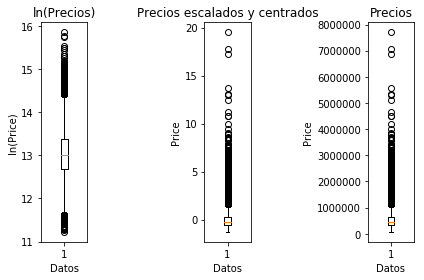

In [11]:
plt.clf()

plt.subplot(1,3,1)
plt.boxplot(list(np.log(df['price'])))
plt.xlabel('Datos')
plt.ylabel('ln(Price)')
plt.title('ln(Precios)')

plt.subplot(1,3,2)
plt.boxplot(list(df_scaled['price']))
plt.xlabel('Datos')
plt.ylabel('Price')
plt.title('Precios escalados y centrados')

plt.subplot(1,3,3)
plt.boxplot(list(df['price']))
plt.xlabel('Datos')
plt.ylabel('Price')
plt.title('Precios')

plt.tight_layout()

plt.show()

Esta distribución (la de la izquierda) es más similar a la normal. Además, los datos caen en un intervalo más acotado que escalándolos y estandarizándolos. Por lo tanto, el modelo de regresión lineal resultante de esta representación debería ser mucho más estable cuando el precio de una casa es un outlier demasiado alto.

Entonces, se aplica el logaritmo natural y se usa el resultado como la versión escalada del atributo 'price':

In [12]:
df_scaled['price'] = np.log(df['price'])

###### d. Regresión lineal de mínimos cuadrados 

In [13]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] 
#X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg2 = lm.LinearRegression(fit_intercept = True)
linreg2.fit(Xtrain, ytrain)
linreg2.coef_.reshape(-1,1)

array([[-0.00826988],
       [ 0.05595975],
       [ 0.0577688 ],
       [ 0.02215948],
       [ 0.0375946 ],
       [ 0.03352637],
       [ 0.04208246],
       [ 0.04527676],
       [ 0.18621242],
       [ 0.04713012],
       [ 0.03169903],
       [-0.10987522],
       [ 0.01479813],
       [ 0.18627732],
       [-0.00407919],
       [ 0.08593267],
       [-0.00701264]])

In [14]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
print (Xtrain.shape)
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
print (Xtrain.columns)
linreg.coef_.reshape(-1,1)


(15129, 18)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')


array([[ -8.26987934e-03],
       [  5.59597464e-02],
       [  5.77687964e-02],
       [  2.21594833e-02],
       [  3.75946006e-02],
       [  3.35263653e-02],
       [  4.20824650e-02],
       [  4.52767575e-02],
       [  1.86212419e-01],
       [  4.71301183e-02],
       [  3.16990298e-02],
       [ -1.09875223e-01],
       [  1.47981265e-02],
       [  1.86277321e-01],
       [ -4.07918551e-03],
       [  8.59326727e-02],
       [ -7.01264301e-03],
       [  1.30396924e+01]])

X.insert(X.shape[1], 'intercept', np.ones(N)) se utiliza para agregar el intercepto con el eje de la variable objetivo en la regresion planteada ($X * \hat{\beta} + \beta_0$). Así entonces, el coeficiente $\beta_0$ se considera dentro de la matriz de datos X, pasando a tener dimension $n \times d+1$.
De no realizar este proceso, se debería realizar la tarea adicional de determinar el intercepto con el eje Y (precio estimado), correspondiendo éste a la media de los precios, tal como se aprecia en el vector de coeficientes de la regresión (donde evidentemente se obtienen iguales pesos para cada atributo). Esto significa que la regresión obtenida se encuentra desplazada. 

Así entonces, el vector de coeficientes de la primera regresión indica tanto la pendiente de la regresión, como el intercepto (13.039). Mientras que el segundo vector de coeficiente indica sólo la pendiente.  


Cabe destacar que el paŕametro fit_intercept debe corresponderse a la tarea de agregar o no los valores 1 como nuevo atributo a la matriz de datos.  

# AGREGAR EL PROMEDIO PARA QUE TODOS NOS CREAN !!!!! Promedio = 5.400881e+05, Intercepto Bo = 460008.38 [exp (13.039)] y la media es 4.500000e+05  
## estoy puro leseando, tengo que sacar el prom de lo de entrenamiento y calzaran e.e


###### e. Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable)

Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Que variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Que es lo que observa y cuál puede ser la causa?

El z-score del vector predictor $\hat{\beta}$ se define como:


\begin{align}
Z\ score & = \frac{\hat{\beta}}{\sqrt{Var(\hat{\beta})}}
\end{align}

Donde:

\begin{align}
Var(\hat{\beta}) & = \sigma^2(X^T·X)^{-1} \\
\sigma^2 & = \frac{1}{m}\sum_{i}^{m}{(y_i - \hat{y}_i)^2} \\
\end{align}

Y $X$ es la matriz cuyas columnas son los $d$ atributos y cuyas filas son los $m$ ejemplos de entrenamiento. Por último, el vector de predicciones $\hat{y}$ se define como:

\begin{align}
\hat{y} & = X·\hat{\beta}
\end{align}


In [15]:
beta=linreg.coef_.reshape(-1,1)
beta

array([[ -8.26987934e-03],
       [  5.59597464e-02],
       [  5.77687964e-02],
       [  2.21594833e-02],
       [  3.75946006e-02],
       [  3.35263653e-02],
       [  4.20824650e-02],
       [  4.52767575e-02],
       [  1.86212419e-01],
       [  4.71301183e-02],
       [  3.16990298e-02],
       [ -1.09875223e-01],
       [  1.47981265e-02],
       [  1.86277321e-01],
       [ -4.07918551e-03],
       [  8.59326727e-02],
       [ -7.01264301e-03],
       [  1.30396924e+01]])

###### Proceso para obtención de z-score

In [16]:
XT= np.transpose(Xtrain.as_matrix())
print (Xtrain.columns)
XTX= np.dot(XT, Xtrain.as_matrix())
print (XTX.shape)
print ("El determinante de la matriz X^T X corresponde a: ",  np.linalg.det(XTX))
eigenvalues= np.linalg.eig(XTX)[0].reshape(-1,1)
print ("\nMientras que los valores propios de la misma son: ")
print (eigenvalues)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')
(18, 18)
El determinante de la matriz X^T X corresponde a:  -1.20829463848e+57

Mientras que los valores propios de la misma son: 
[[  7.60216839e+04]
 [  3.12492543e+04]
 [  2.73713285e+04]
 [  1.97938266e+04]
 [  1.72108891e+04]
 [  1.51500524e+04]
 [  1.49113282e+04]
 [  1.33015124e+04]
 [  1.11256313e+04]
 [  9.85673850e+03]
 [  8.04829291e+03]
 [  7.65992255e+03]
 [  5.00239793e+03]
 [  4.40471585e+03]
 [  2.85802165e+03]
 [  3.29851598e+03]
 [  3.60591045e+03]
 [ -3.26010191e-12]]


In [17]:
XTX_1= np.linalg.inv(XTX)
print ("\nLa matriz (X^T X)^-1 es: \n\n", XTX_1.view())


La matriz (X^T X)^-1 es: 

 [[  1.15008239e-04  -3.46712878e-05  -1.03329857e-04   2.66922273e-06
    3.82221198e-06   5.17695308e-06   7.61147764e-06  -3.19019421e-06
    1.90028086e-05   4.08980351e-05   1.29508183e-05   7.89434554e-06
    3.25976100e-06   4.37656534e-06  -1.64151727e-06   2.74668235e-06
    5.79377126e-06  -6.87525696e-07]
 [ -3.46712878e-05   2.25685494e-04   4.44905660e-05  -8.69525116e-07
   -4.80851265e-05  -1.20122179e-06  -2.25869707e-06  -9.43471570e-06
   -1.78927283e-05  -9.93881218e-05  -8.60045166e-05  -6.36317010e-05
   -1.71927321e-05  -2.82959764e-06   3.42438140e-06   4.09856275e-06
    4.94143527e-06  -9.98156258e-08]
 [ -1.00394211e-04   2.07037462e-05  -1.36402957e+11  -1.49105948e-05
    3.06179635e-05  -2.73457042e-05   2.77474220e-05   1.85376235e-05
   -2.62032498e-04   1.22984569e+11   6.57293732e+10   4.64920895e-05
    1.93958142e-06   1.84950954e-05  -1.52449686e-06  -1.49341792e-05
    6.10628455e-07   2.60354948e-05]
 [  2.66922273e-06  

In [18]:
yt=ytrain
print (y.shape)
print (Xtrain.columns)
y_est=linreg.predict(Xtrain)
resta = yt-y_est
sigma_2= np.mean(np.square(resta))
#cada matriz esta compuesta por vectores columna ojo
z_score = []
for j in range(XTX_1.shape[1]):
    z_score_j= beta[j][0]/(np.sqrt(sigma_2) * np.sqrt(XTX_1[j][j]))
    z_score.append(z_score_j)

z_score

(21613,)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')


c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


[-3.0359869385473486,
 14.665238063387005,
 nan,
 7.6022651783803132,
 12.277599157353118,
 14.794985247618559,
 17.40163201482704,
 20.549722913697945,
 48.098398316417338,
 nan,
 nan,
 -33.81178966324557,
 6.8941165462801308,
 85.849011519154757,
 -1.5908817238879334,
 23.58346551036631,
 -2.3482547562693528,
 6224.3254162887997]

In [22]:
#INSTALL  conda install -c conda-forge tabulate 
#tablefmt: https://github.com/gregbanks/python-tabulate
from tabulate import tabulate
table = [z_score,beta,X.columns]
print (tabulate(zip(*table), headers=['z-Score_i', 'Beta_i', 'Atributo_i'],tablefmt="pipe"))
#pprint(z_score)

|   z-Score_i |      Beta_i | Atributo_i    |
|------------:|------------:|:--------------|
|    -3.03599 | -0.00826988 | bedrooms      |
|    14.6652  |  0.0559597  | bathrooms     |
|   nan       |  0.0577688  | sqft_living   |
|     7.60227 |  0.0221595  | sqft_lot      |
|    12.2776  |  0.0375946  | floors        |
|    14.795   |  0.0335264  | waterfront    |
|    17.4016  |  0.0420825  | view          |
|    20.5497  |  0.0452768  | condition     |
|    48.0984  |  0.186212   | grade         |
|   nan       |  0.0471301  | sqft_above    |
|   nan       |  0.031699   | sqft_basement |
|   -33.8118  | -0.109875   | yr_built      |
|     6.89412 |  0.0147981  | yr_renovated  |
|    85.849   |  0.186277   | lat           |
|    -1.59088 | -0.00407919 | long          |
|    23.5835  |  0.0859327  | sqft_living15 |
|    -2.34825 | -0.00701264 | sqft_lot15    |
|  6224.33    | 13.0397     | intercept     |



Variables más correlacionadas: 

1. lat  
2. grade  
3. yr_built  
4. sqft_living15  
5. condition  
6. view  
7. waterfront    
8. bathrooms  
9. floors  
10. sqft_lot  
11. yr_renovated  
12. bedrooms  
13. sqft_lot15  

Usando nivel de significancia del 5%, bajo la hipotesis de que $\beta_i = 0$, es decir, el atributo i-ésimo no tiene impacto sobre la variable target, y de que z-score se distribuye ~$t_{N-(D-1)}$ con N datos de entrenamiento, D la dimensionalidad de los datos incluído el intercepto (debiéndose entonces restar 1), se considera como valor frontera $1.96$ ($t_{\infty}$).  
De este modo, con un 95% de certeza, es posible asegurar que los 14 atributos listados corresponderían a una dimensión correlacionada con la variable target independientemente de si se trata de valores positivos o negativos puesto que z-score mide la distancia (desviación estandar) a la media (centro de los datos de entrenamiento).  
Aún así, se observa que algunos estadisticos corresponden a NaN (not a number) lo que se debe a que, en algunos coeficientes de la diagonal de la matriz (M^T x T)^-1, existen valores negativos. Por ende, la raiz cuadrada no debiese entregar un valor real, afectando directamente al z-score.  
  
Para arreglar esto se propone analizar la correlación e impacto de los atributos correspondientes sobre la variable target para así llevar a cabo el reajuste de nuestro modelo basándonos en técnicas de Ingeniería de atributos.


###### f. Corrección 

Para corregir el modelo se debe analizar la correlación entre las variables en cuestión:

In [19]:
Xtrain_C= Xtrain.copy(deep=True)
print (Xtrain_C.columns)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')


In [20]:
Xtrain_C.drop(['sqft_living'],axis=1,inplace=True)
Xtrain_C.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'intercept'],
      dtype='object')

In [21]:
linregC = lm.LinearRegression(fit_intercept = False)
linregC.fit(Xtrain_C, ytrain)
beta_c=linregC.coef_.reshape(-1,1)
beta_c
#Se entrega entonces el nuevo B (sin sqft_living...entonces es dimension 17X1 (16 caract. + intercepto))

array([[ -8.26987934e-03],
       [  5.59597464e-02],
       [  2.21594833e-02],
       [  3.75946006e-02],
       [  3.35263653e-02],
       [  4.20824650e-02],
       [  4.52767575e-02],
       [  1.86212419e-01],
       [  9.92160165e-02],
       [  5.95364526e-02],
       [ -1.09875223e-01],
       [  1.47981265e-02],
       [  1.86277321e-01],
       [ -4.07918551e-03],
       [  8.59326727e-02],
       [ -7.01264301e-03],
       [  1.30396924e+01]])

In [22]:
XcT= np.transpose(Xtrain_C.as_matrix())
XcTXc= np.dot(XcT, Xtrain_C.as_matrix())
print (XcTXc.shape)
print ("El determinante de la matriz Xc^T Xc corresponde a: ",  np.linalg.det(XcTXc))
eigenvalues_c= np.linalg.eig(XcTXc)[0].reshape(-1,1)
print ("\nMientras que los valores propios de la misma son: ")
print (eigenvalues_c)
XcTXc_1= np.linalg.inv(XcTXc)
print ("\nLa matriz (Xc^T Xc)^-1 es: \n\n", XcTXc_1.view())

(17, 17)
El determinante de la matriz Xc^T Xc corresponde a:  1.6481496146e+68

Mientras que los valores propios de la misma son: 
[[ 64289.26228847]
 [ 30117.6199562 ]
 [ 27336.21163165]
 [ 19530.66698975]
 [ 17172.66402657]
 [ 15136.3317766 ]
 [ 14906.97730495]
 [ 13300.69588659]
 [ 11116.74469329]
 [  9843.92523564]
 [  8012.58583285]
 [  7488.30155466]
 [  1987.2211252 ]
 [  4777.86087747]
 [  4399.12669143]
 [  3494.17175137]
 [  3228.25254455]]

La matriz (Xc^T Xc)^-1 es: 

 [[  1.15008239e-04  -3.46712878e-05   2.66922273e-06   3.82221198e-06
    5.17695308e-06   7.61147764e-06  -3.19019421e-06   1.90028086e-05
   -5.76095750e-05  -3.32440776e-05   7.89434554e-06   3.25976100e-06
    4.37656534e-06  -1.64151727e-06   2.74668235e-06   5.79377126e-06
   -6.87525696e-07]
 [ -3.46712878e-05   2.25685494e-04  -8.69525116e-07  -4.80851265e-05
   -1.20122179e-06  -2.25869707e-06  -9.43471570e-06  -1.78927283e-05
   -8.09640130e-05  -6.99122949e-05  -6.36317010e-05  -1.71927321e-05
   -

In [23]:
yc=ytrain
print (Xtrain_C.shape)
y_est_c=linregC.predict(Xtrain_C)
resta_c = yc-y_est_c
sigma_c_2= np.mean(np.square(resta_c))
z_score_c = []

for j in range(XcTXc_1.shape[1]):
    z_score_j= beta_c[j][0]/(np.sqrt(sigma_c_2)* np.sqrt(XcTXc_1[j][j]))    
    z_score_c.append(z_score_j)

z_score_c

(15129, 17)


[-3.0359869385500096,
 14.66523806338687,
 7.6022651783803541,
 12.277599157351649,
 14.794985247620851,
 17.401632014825228,
 20.549722913698254,
 48.098398316418958,
 21.098520871211189,
 20.679680340653647,
 -33.81178966324228,
 6.8941165462789948,
 85.849011519153052,
 -1.5908817238884096,
 23.5834655103648,
 -2.3482547562709515,
 6224.3254162888052]

In [28]:
table = [z_score_c,beta_c,Xtrain_C.columns]
print (tabulate(zip(*table), headers=['z-Score_i', 'Beta_i', 'Atributo_i'],tablefmt="pipe"))

|   z-Score_i |      Beta_i | Atributo_i    |
|------------:|------------:|:--------------|
|    -3.03599 | -0.00826988 | bedrooms      |
|    14.6652  |  0.0559597  | bathrooms     |
|     7.60227 |  0.0221595  | sqft_lot      |
|    12.2776  |  0.0375946  | floors        |
|    14.795   |  0.0335264  | waterfront    |
|    17.4016  |  0.0420825  | view          |
|    20.5497  |  0.0452768  | condition     |
|    48.0984  |  0.186212   | grade         |
|    21.0985  |  0.099216   | sqft_above    |
|    20.6797  |  0.0595365  | sqft_basement |
|   -33.8118  | -0.109875   | yr_built      |
|     6.89412 |  0.0147981  | yr_renovated  |
|    85.849   |  0.186277   | lat           |
|    -1.59088 | -0.00407919 | long          |
|    23.5835  |  0.0859327  | sqft_living15 |
|    -2.34825 | -0.00701264 | sqft_lot15    |
|  6224.33    | 13.0397     | intercept     |


Se oberva que al eliminar la caraterística 'sqft_living', se obtiene z-score 21.1 y 20.68 para 'sqft_above' y 'sqft_basement' los cuales correspondían a NaN antes de la corrección. De manera similar, el atributo 'long' sigue siendo despreciable. Por lo tanto, se eliminará también este atributo.

In [24]:
Xtrain_C.drop(['long'],axis=1,inplace=True)
Xtrain_C.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')

In [25]:
linregC = lm.LinearRegression(fit_intercept = False)
linregC.fit(Xtrain_C, ytrain)
beta_c=linregC.coef_.reshape(-1,1)
beta_c
#Se entrega entonces el nuevo B (sin sqft_living ni long...entonces es dimension 16X1 (15 caract. + intercepto))

array([[ -8.33558721e-03],
       [  5.60968200e-02],
       [  2.19164635e-02],
       [  3.80651551e-02],
       [  3.35763563e-02],
       [  4.24407853e-02],
       [  4.50702314e-02],
       [  1.87068259e-01],
       [  9.84880341e-02],
       [  5.99900421e-02],
       [ -1.11727665e-01],
       [  1.46109307e-02],
       [  1.86335187e-01],
       [  8.48755390e-02],
       [ -7.48252725e-03],
       [  1.30395542e+01]])

In [26]:
XcT= np.transpose(Xtrain_C.as_matrix())
XcTXc= np.dot(XcT, Xtrain_C.as_matrix())
print (XcTXc.shape)
print ("El determinante de la matriz Xc^T Xc corresponde a: ",  np.linalg.det(XcTXc))
eigenvalues_c= np.linalg.eig(XcTXc)[0].reshape(-1,1)
print ("\nMientras que los valores propios de la misma son: ")
print (eigenvalues_c)
XcTXc_1= np.linalg.inv(XcTXc)
print ("\nLa matriz (Xc^T Xc)^-1 es: \n\n", XcTXc_1.view())

(16, 16)
El determinante de la matriz Xc^T Xc corresponde a:  1.67957022012e+64

Mientras que los valores propios de la misma son: 
[[ 62149.83717849]
 [ 27840.99037085]
 [ 27101.61756435]
 [ 19390.6320131 ]
 [ 17060.73627943]
 [ 15040.85367722]
 [ 14831.72825264]
 [ 13292.19687542]
 [  9845.20095974]
 [  8154.81805598]
 [  7890.24585841]
 [  2007.21948736]
 [  5394.61780039]
 [  3505.23561824]
 [  3432.90720585]
 [  4423.47226821]]

La matriz (Xc^T Xc)^-1 es: 

 [[  1.14981797e-04  -3.46161276e-05   2.57142841e-06   4.01156924e-06
    5.19707010e-06   7.75567040e-06  -3.27330301e-06   1.93472098e-05
   -5.79025246e-05  -3.30615472e-05   7.14889864e-06   3.18443098e-06
    4.39985139e-06   2.32127800e-06   5.60468373e-06  -7.43139587e-07]
 [ -3.46161276e-05   2.25570424e-04  -6.65515649e-07  -4.84801461e-05
   -1.24318805e-06  -2.55949866e-06  -9.26134181e-06  -1.86111862e-05
   -8.03528887e-05  -7.02930728e-05  -6.20766186e-05  -1.70355856e-05
   -2.87817485e-06   4.98600192e-06   5.3

In [27]:
yc=ytrain
print (Xtrain_C.shape)
y_est_c=linregC.predict(Xtrain_C)
resta_c = yc-y_est_c
sigma_c_2= np.mean(np.square(resta_c))
z_score_c = []

for j in range(XcTXc_1.shape[1]):
    z_score_j= beta_c[j][0]/(np.sqrt(sigma_c_2)* np.sqrt(XcTXc_1[j][j]))    
    z_score_c.append(z_score_j)

z_score_c

(15129, 16)


[-3.0602050848520554,
 14.703680081699911,
 7.5286090660622085,
 12.488633807809702,
 14.817231460639402,
 17.624944591886429,
 20.489873993343927,
 48.788739327758648,
 21.041822083344954,
 20.938422658205578,
 -36.824181605953527,
 6.8165869187459203,
 85.88056547579626,
 23.688633080420633,
 -2.5177353732725534,
 6229.0965920045228]

In [33]:
table = [z_score_c,beta_c,Xtrain_C.columns]
print (tabulate(zip(*table), headers=['z-Score_i', 'Beta_i', 'Atributo_i'],tablefmt="pipe"))

|   z-Score_i |      Beta_i | Atributo_i    |
|------------:|------------:|:--------------|
|    -3.06021 | -0.00833559 | bedrooms      |
|    14.7037  |  0.0560968  | bathrooms     |
|     7.52861 |  0.0219165  | sqft_lot      |
|    12.4886  |  0.0380652  | floors        |
|    14.8172  |  0.0335764  | waterfront    |
|    17.6249  |  0.0424408  | view          |
|    20.4899  |  0.0450702  | condition     |
|    48.7887  |  0.187068   | grade         |
|    21.0418  |  0.098488   | sqft_above    |
|    20.9384  |  0.05999    | sqft_basement |
|   -36.8242  | -0.111728   | yr_built      |
|     6.81659 |  0.0146109  | yr_renovated  |
|    85.8806  |  0.186335   | lat           |
|    23.6886  |  0.0848755  | sqft_living15 |
|    -2.51774 | -0.00748253 | sqft_lot15    |
|  6229.1     | 13.0396     | intercept     |


Donde cada $|z_{i}|$ es mayor al umbral $1.96$. Así, cada atributo es no nulo con al menos un 95% de confianza.

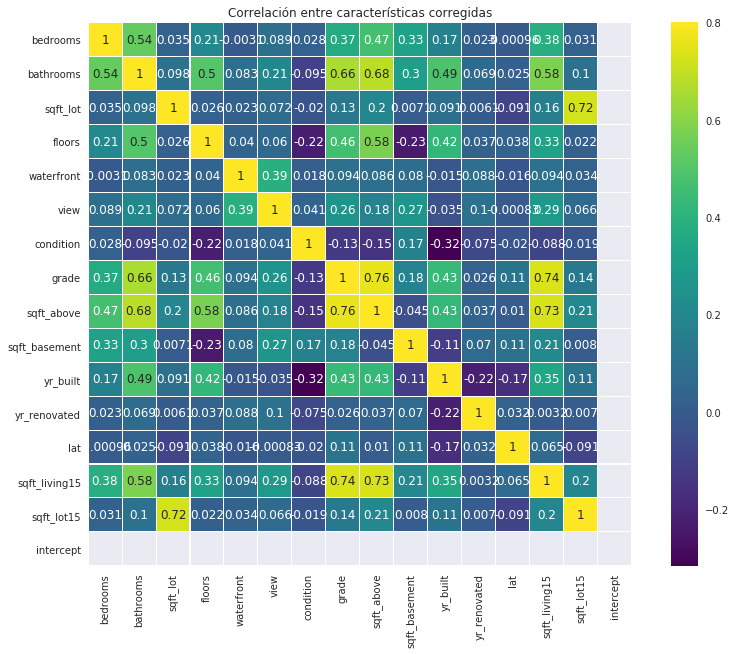

In [34]:
plt.figure(figsize=(14,10))
sns.heatmap(Xtrain_C.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlación entre características corregidas');
plt.show()

Basándose en los métodos de ingerniería de atributos, para corregir el problema de obtener z-scores NaN se propone eliminar el atributo 'sqft_living' puesto que ésta presentaba un nivel de correlación con otros atributos como 'grade', 'sqft_living15', 'sqft_above', 'bathrooms' (sobre 70%).  
Contar con una variable altamente correlacionada con otras indica entonces que los vectores de la matriz X no son ortogonales, traduciéndose en valores negativos en la matriz inversa de covarianza. Cabe destacar también, que de este modo se logra reducir la dimensionalidad del problema.  

Así, se obtienen sólo valores numéricos para el vector de z-scores

El trabajo en los siguientes ítems, por lo tanto, se hará sin considerar los atributos eliminados 'sqft_living' y 'long'.

###### f. Error de predicción del modelo mediante validación cruzada 

Dado que el dataframe original ha sido actualizado, es decir, se ha modificado la matriz X eliminando el atributo 'sqft_living' y 'long', es necesario actualizar también Xtest

In [28]:
Xtest_C= Xtest.copy(deep=True)
Xtest_C.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')

In [29]:
Xtest_C.drop(['sqft_living', 'long'],axis=1,inplace=True)
Xtest_C.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')

In [30]:
yhat_test = linregC.predict(Xtest_C)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain_C.as_matrix()
ym = ytrain.as_matrix()

mse_test

0.06535951084173329

In [38]:
from sklearn.model_selection import KFold
#variar K (# folds)
kf = KFold(n_splits=10)
mse_cv = 0

for train, val in kf.split(Xm):
    #print ("Train index:", train , " Val index:", val)
    #se obtiene la regresion lineal a partir de los kfolds de entrenamiento
    linregCV10 = lm.LinearRegression(fit_intercept = False)
    linregCV10.fit(Xm[train], ym[train])
    #y estimado corresponde a los y calculados por la regresion para el kfold de validacion
    yhat_val = linregCV10.predict(Xm[val])
    #asi el error cuadratico medio del fold es
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    print ("\nError cuadrático medio del fold es: ", mse_fold)
    mse_cv += mse_fold
    print ("Mientras que el error acumulado seria: ", mse_cv)
    
mse_cv = mse_cv / 10
print ("Así, el error cuadrático medio ponderado es de: ", mse_cv)


Error cuadrático medio del fold es:  0.0623519514253
Mientras que el error acumulado seria:  0.0623519514253

Error cuadrático medio del fold es:  0.0614702715622
Mientras que el error acumulado seria:  0.123822222987

Error cuadrático medio del fold es:  0.0732012307099
Mientras que el error acumulado seria:  0.197023453697

Error cuadrático medio del fold es:  0.0667779424414
Mientras que el error acumulado seria:  0.263801396139

Error cuadrático medio del fold es:  0.0607579627585
Mientras que el error acumulado seria:  0.324559358897

Error cuadrático medio del fold es:  0.0673783296057
Mientras que el error acumulado seria:  0.391937688503

Error cuadrático medio del fold es:  0.0611645147168
Mientras que el error acumulado seria:  0.45310220322

Error cuadrático medio del fold es:  0.0598863543333
Mientras que el error acumulado seria:  0.512988557553

Error cuadrático medio del fold es:  0.0691399980251
Mientras que el error acumulado seria:  0.582128555578

Error cuadrático m

In [39]:
kf = KFold(n_splits=5)
mse_cv_5 = 0
for train, val in kf.split(Xm):
    #print ("Train index:", train , " Val index:", val)
    linregCV5 = lm.LinearRegression(fit_intercept = False)
    linregCV5.fit(Xm[train], ym[train])
    yhat_val_5 = linregCV5.predict(Xm[val])
    mse_fold_5 = np.mean(np.power(yhat_val_5 - ym[val], 2))
    print ("\nError cuadrático medio del fold es: ", mse_fold_5)
    mse_cv_5 += mse_fold_5
    print ("Mientras que el error acumulado seria: ", mse_cv_5)
    
mse_cv_5 = mse_cv_5 / 5
print ("Así, el error cuadrático medio ponderado es de: ", mse_cv_5)


Error cuadrático medio del fold es:  0.0619233180961
Mientras que el error acumulado seria:  0.0619233180961

Error cuadrático medio del fold es:  0.0699794509683
Mientras que el error acumulado seria:  0.131902769064

Error cuadrático medio del fold es:  0.0640775887885
Mientras que el error acumulado seria:  0.195980357853

Error cuadrático medio del fold es:  0.0605014198196
Mientras que el error acumulado seria:  0.256481777673

Error cuadrático medio del fold es:  0.0669829782638
Mientras que el error acumulado seria:  0.323464755936
Así, el error cuadrático medio ponderado es de:  0.0646929511873


In [40]:
print ("Error de precisión CV 10 folds: ", mse_cv)
print ("Error de precisión CV 5 folds: ", mse_cv_5)
print ("Error sobre conjunto test: ", mse_test)

Error de precisión CV 10 folds:  0.0646851754199
Error de precisión CV 5 folds:  0.0646929511873
Error sobre conjunto test:  0.06535951084173308


La validación cruzada es una técnica utilizada para evaluar los resultados de un análisis estadístico y probar la independencia de la partición hecha para datos de entrenamiento y validación. Dado un número de iteraciones, se genera una regresión lineal en cada una de estas tal que se obtenga el error de predicción cuadrático medio en base a los datos de entrenamiento de la división (subconjunto i-ésimo). Este valor variará dependiendo de las características de los datos utilizados en cada ciclo e indicará la precisión del modelo utilizado.

El proceso de validación cruzada es especialmente recomendable para cuando la cantidad de datos con los que se dispone no son muchos, pudiendo así comparar los resultados con un pequeño conjunto de validación que se actualizará (rotará) en cada iteración sin requerir entonces, un conjunto explícito de datos de prueba (test).  

Así entonces, se puede notar que este proceso logra mejor precisión que cuando se entrena una única vez con el total de los datos.  
($MSE TEST \approx 0.065359$ mientras que $MSE CV \in [0.064685, 0.064692]$)


###### g. Errores de predicción mediante "quantile-quantile plot” 

Siendo los errores de predicción para cada dato de entrenamiento los previamente calculados (resta_c), se presenta un “quantile-quantile plot”:

/etc/Anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


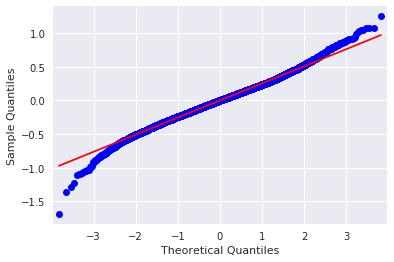

In [41]:
import numpy as np
import statsmodels.api as sm
import pylab
pylab.clf
residuos= resta_c
residuos2 = np.square(resta_c)
sm.qqplot(residuos, line='s') #sm.qqplot(resta_c, line='s')

Al observar la tendencia de los residuos sobre la recta que supone distribución normal, es posible notar puntos que se alejan de ella hacia abajo en el inicio. Estos residuos representan una cola hacia la izquiera que decae rápidamente (con precios sobreestimados). De manera contraria ocurre para los outliers observados en la derecha, donde se evidencian muchos más datos. Por ende, la cola derecha es mucho mas larga. Es decir, los precios fueron subestimados. Esto se corresponde con el sesgo hacia los precios más bajos en el conjunto de datos.

A pesar de esto, la distribución observada es similar a la normal, por lo que se acepta la hipótesis planteada.

## 2. Selección de atributos

###### a- Construya una función que implemente Forward Step-wise Selection (FSS)

Construya una funcion que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresion en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el codigo de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como funcion del numero de variables en el modelo. Ordene el eje x de menor a mayo

### Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el codigo de ejemplo [listo! explained_var].    
### Construya un grafico que muestre el error de entrenamiento y el error de pruebas como funcion del numero de variables en el modelo.  Ordene el eje x de menor a mayor

In [75]:
from sklearn.metrics import explained_variance_score

def fss(xtr, ytr, xte, yte, names_x, k = 10000):
    p = xtr.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(np.arange(p))
    selected = [p]
    current_score = best_new_score = 0.0 # los puntajes mayores son mejores
    
    mse_atribs_train = {}
    mse_atribs_test = {}
    
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = xtr[:,indexes]
            predictions_train = model.fit(x_train, ytr).predict(x_train)
            residuals_train = predictions_train - ytr 
            mse_candidate_train = np.mean(np.power(residuals_train, 2))
            x_test = xte[:,indexes]
            model = lm.LinearRegression(fit_intercept=False)
            predictions_test = model.fit(x_train, ytr).predict(x_test) # Entrenar con conjunto train; predecir el de prueba
            residuals_test = predictions_test - yte 
            mse_candidate_test = np.mean(np.power(residuals_test, 2))
            #mse_candidates.append((mse_candidate, candidate))
            exp_var=explained_variance_score(ytr,predictions_train) # entre mas alto (1) mejor
            score_candidates.append((exp_var, candidate, mse_candidate_train, mse_candidate_test))
        score_candidates.sort() # Ordena de menor a mayor comparando el primer elemento de cada tupla (explained_var)
        best_new_score, best_candidate, mse_best_candidate_train, mse_best_candidate_test, = score_candidates.pop() # saca la tupla de mayor score explained_var (ultimo elemento)
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, explained_var = %f"%(len(indexes),best_new_score))
        mse_atribs_train[len(indexes)] = mse_best_candidate_train
        mse_atribs_test[len(indexes)] = mse_best_candidate_test
    return selected, mse_atribs_train, mse_atribs_test

Se ejecuta fss() sobre el dataset, y se evalúa el error cuadrático medio de entrenamiento y pruebas con la inclusión de cada atributo adicional.

In [77]:
names_regressors = X.columns[:-1] #without intercept

limit = int(len(X)*0.7)

Xtr = X[:limit].as_matrix()
Ytr = y[:limit]

Xte = X[limit:].as_matrix()
Yte = y[limit:]

seleccionados, mse_tr, mse_te = fss(Xtr, Ytr, Xte, Yte, names_regressors)

selected = grade ...
totalvars=2, explained_var = 0.483659
selected = lat ...
totalvars=3, explained_var = 0.627540
selected = sqft_living ...
totalvars=4, explained_var = 0.693786
selected = yr_built ...
totalvars=5, explained_var = 0.728073
selected = view ...
totalvars=6, explained_var = 0.741283
selected = sqft_living15 ...
totalvars=7, explained_var = 0.747780
selected = bathrooms ...
totalvars=8, explained_var = 0.754010
selected = condition ...
totalvars=9, explained_var = 0.759007
selected = waterfront ...
totalvars=10, explained_var = 0.762713
selected = floors ...
totalvars=11, explained_var = 0.765340
selected = sqft_lot ...
totalvars=12, explained_var = 0.766374
selected = yr_renovated ...
totalvars=13, explained_var = 0.767098
selected = bedrooms ...
totalvars=14, explained_var = 0.767228
selected = sqft_basement ...
totalvars=15, explained_var = 0.767333
selected = sqft_lot15 ...
totalvars=16, explained_var = 0.767431
selected = long ...
totalvars=17, explained_var = 0.76

A continuación se grafica el error cuadrático medio (MSE) en función de la cantidad de atributos seleccionados.

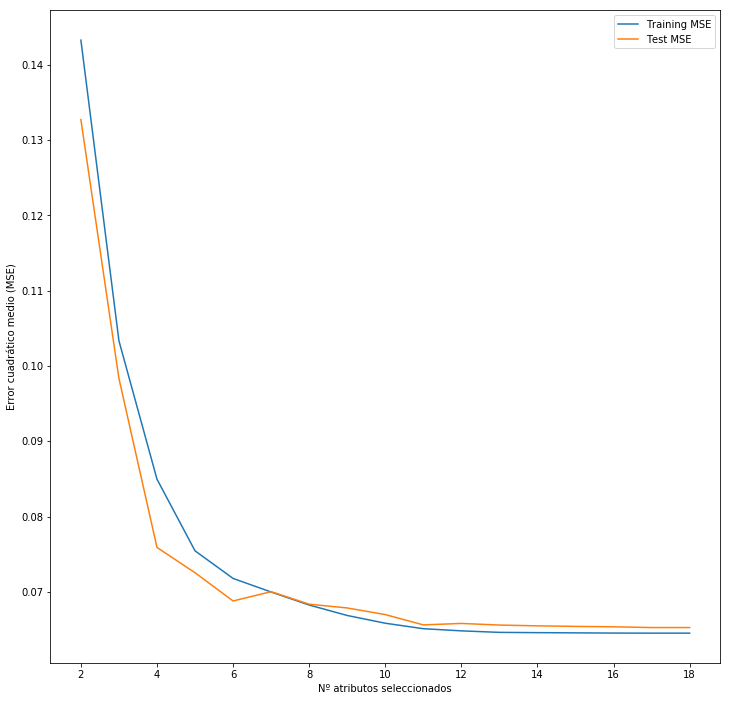

In [78]:
plt.clf()
fig = plt.figure(figsize=(12,12))

ax = plt.gca()
ax.plot(list(mse_tr.keys()),list(mse_tr.values()),label='Training MSE')
ax.plot(list(mse_te.keys()),list(mse_te.values()),label='Test MSE')
plt.xlabel('Nº atributos seleccionados')
plt.ylabel('Error cuadrático medio (MSE)')
plt.legend(loc=1)

plt.show()

Hay dos cosas importantes que es posible notar. Primero, ambos errores disminuyen siempre cuando se ingresa un nuevo atributo al modelo, a excepción de cuando se ingresa el séptimo ('sqft_living'), lo que provoca un ligero aumento del error de pruebas. Segundo, a partir de ese mismo punto, el error de pruebas pasa a ser mayor que el de entrenamiento, pero manteniendo la disminución consistente. Otro aumento leve en el error de pruebas se produce al introducir la 12º característica, 'sqft_lot'.

A partir de los 12 atributos seleccionados, el error de entrenamiento tiende a ser constante: el aumento en ajuste con el conjunto de entrenamiento es casi nulo cuando se ingresa la 13º característica y las siguientes. El error de pruebas presenta una muy leve mejora en el mismo intervalo. Por lo tanto, a pesar de que el modelo no se ajustó más al conjunto de entrenamiento, sí logró generalizar un poco mejor cuando se incluían características adicionales.

In [85]:
print('Min. Train MSE = %.5f (%d attribs.)' % (min(list(mse_tr.values())), list(mse_tr.keys())[list(mse_tr.values()).index(min(list(mse_tr.values())))]))
print('Min. Test MSE = %.5f (%d attribs.)' % (min(list(mse_te.values())), list(mse_te.keys())[list(mse_te.values()).index(min(list(mse_te.values())))]))

Min. Train MSE = 0.06452 (18 attribs.)
Min. Test MSE = 0.06526 (18 attribs.)


Ambos errores llegan a su mínimo si todos los 18 atributos son incluidos. Esto tiene sentido ya que la dimensionalidad de la entrada se mantiene relativamente baja respecto a la cantidad de datos disponibles. Si el dataset tuviese muchos más atributos y la misma cantidad de datos, entonces hubiese sido posible observar un aumento de los errores con el ingreso de características adicionales a las 18 originales.

## 3. Regularización (Utilizando el dataframe de la actividad anterior)

###### a. Ajuste del modelo lineal utilizando “Ridge Regression”

Se usará $\lambda \in [10^{7}, 10^{1}]$.

In [43]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt

X2 = X.drop('intercept', axis=1,inplace=False)

#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X2))
limit = int(len(X2)*0.7)

Xtrain = X2[:limit]
ytrain = y[:limit]

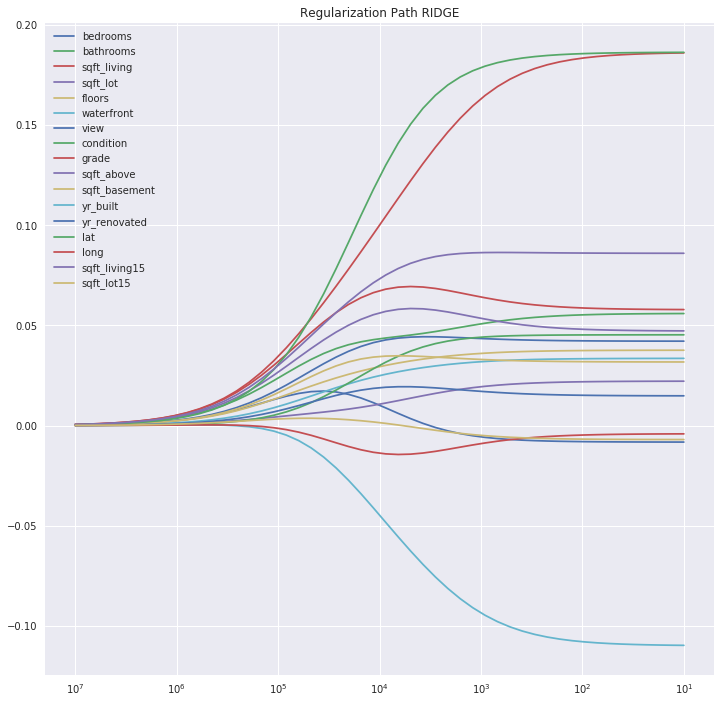

In [44]:
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)

plt.clf()
fig = plt.figure(figsize=(12,12))
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)

plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Usando Ridge con $\lambda \in [10^1, 10^3[$ los parámetros $\hat{\beta}$ no sufren casi ningún cambio. Una convergencia notoria comienza a notarse cuando $\lambda \in [10^3, 10^5[$. Dentro de este intervalo (al rededor de $\lambda = 10^4$), algunos de los parámetros menos importantes (aquellos más cerca del cero) sufren una amplificación leve. La convergencia a cero de todos los parámetros ocurre con valores $\lambda \in [10^5, 10^7]$.

Notar que todos los atributos convergen uniformemente, conservando en parte la proporción entre ellos; no hay atributos que se hagan cero antes que los demás. Por lo tanto, todos seguirán contribuyendo a la función objetivo a medida que $\lambda$ aumenta.

###### b. Ajuste del modelo lineal utilizando el método “Lasso”

Se usará $\lambda \in [10^{0}, 10^{-3}]$.

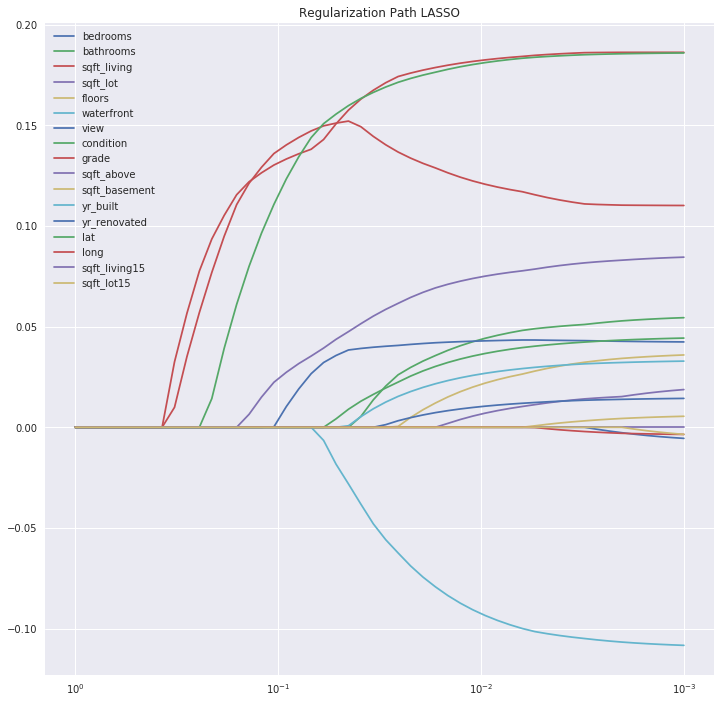

In [45]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt

X2 = X.drop('intercept', axis=1,inplace=False)

#mascara estatica con el 70% de los datos
limit = int(len(X)*0.7)

Xtrain = X2[:limit]
ytrain = y[:limit]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)

    

fig = plt.figure(figsize=(12,12))
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)

plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
#plt.ylim([-0.01,0.01])
#plt.xlimit(-0.01,0.01)
plt.show()


Con Lasso, la convergencia de los atributos a cero ocurre de manera mucho más pronunciada (y con más preferencia sobre aquellos menos importantes) que con Ridge, ya que la corrección se realiza de manera aditiva y no multiplicativa. Así, los atributos menos importantes son descartados con bastante rapidez, mientras que los más importantes no se ven afectados significativamente.

De las dos alternativas, Lasso es la que logra efectivamente seleccionar atributos, ya que descarta primero aquellos que tienen poco aporte (cercanos a cero).

###### c. Error de entrenamiento vs error de pruebas en función del parámetro de regularización

Se elige preliminarmente Lasso como alternativa más confiable, pues se considera que hay pocos atributos que aportan significativamente a la predicción, además que varios de los menos importantes están correlacionados entre sí.

Con esta elección aclarada, se evaluará el desempeño de ambos métodos, incluyendo además el resultado sin aplicar regularización.

21613


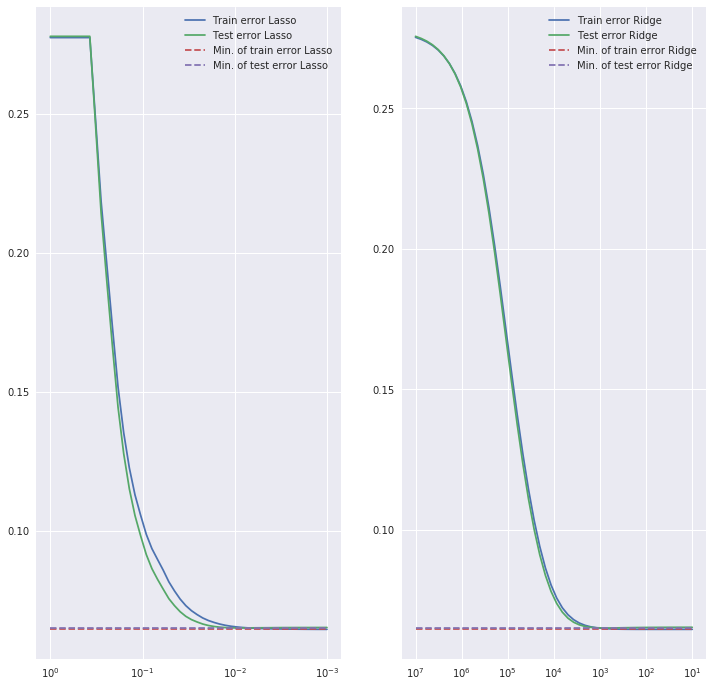

In [46]:
limit= int(len(X2)*0.7)
Xtest = X2[limit:]
ytest = y[limit:]
print (len(y))

# Lasso
alphas_lasso_ = np.logspace(0,-3,base=10)
model_lasso = Lasso(fit_intercept=True)
mse_test_lasso = []
mse_train_lasso = []

for a in alphas_lasso_:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(Xtrain, ytrain)
    yhat_train_lasso = model_lasso.predict(Xtrain)
    yhat_test_lasso = model_lasso.predict(Xtest)
    mse_train_lasso.append(np.mean(np.power(yhat_train_lasso - ytrain, 2)))
    mse_test_lasso.append(np.mean(np.power(yhat_test_lasso - ytest, 2)))

# Ridge
alphas_ridge_ = np.logspace(7,1,base=10)
model_ridge = Ridge(fit_intercept=True)
mse_test_ridge = []
mse_train_ridge = []

for a in alphas_ridge_:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(Xtrain, ytrain)
    yhat_train_ridge = model_ridge.predict(Xtrain)
    yhat_test_ridge = model_ridge.predict(Xtest)
    mse_train_ridge.append(np.mean(np.power(yhat_train_ridge - ytrain, 2)))
    mse_test_ridge.append(np.mean(np.power(yhat_test_ridge - ytest, 2)))

# No regularizer
model_linreg3 = lm.LinearRegression(fit_intercept = True)
mse_test_nr = 0.0
mse_train_nr = 0.0

model_linreg3.fit(Xtrain, ytrain)
yhat_train_nr = model_linreg3.predict(Xtrain)
yhat_test_nr = model_linreg3.predict(Xtest)
mse_train_nr = np.mean(np.power(yhat_train_nr - ytrain, 2))
mse_test_nr = np.mean(np.power(yhat_test_nr - ytest, 2))
    

fig = plt.figure(figsize=(12,12))


plt.subplot(1,2,1)
ax = plt.gca()
ax.plot(alphas_lasso_,mse_train_lasso,label='Train error Lasso')
ax.plot(alphas_lasso_,mse_test_lasso,label='Test error Lasso')
ax.plot(alphas_lasso_,[min(mse_train_lasso)]*len(alphas_lasso_), linestyle='--',label='Min. of train error Lasso')
ax.plot(alphas_lasso_,[min(mse_test_lasso)]*len(alphas_lasso_), linestyle='--',label='Min. of test error Lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.subplot(1,2,2)
ax2 = plt.gca()
ax2.plot(alphas_ridge_,mse_train_ridge,label='Train error Ridge')
ax2.plot(alphas_ridge_,mse_test_ridge,label='Test error Ridge')
ax2.plot(alphas_ridge_,[min(mse_train_ridge)]*len(alphas_ridge_), linestyle='--',label='Min. of train error Ridge')
ax2.plot(alphas_ridge_,[min(mse_test_ridge)]*len(alphas_ridge_), linestyle='--',label='Min. of test error Ridge')
plt.legend(loc=1)
ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1])

plt.show()

Visualmente, es notoria la diferencia entre ambos métodos en su convergencia (el intervalo de $\lambda$ de Ridge es mucho mayor que el de Lasso, por lo que la convergencia es más lenta). Al final, con $\lambda$ en el orden de $10^0$, Lasso llega a eliminar todos los atributos, llegando a un tope en el error cuadrático medio a causa de underfitting. Ridge, en cambio, converge a este tope de manera suave.

Aparte de eso, el efecto en la calidad de las predicciones no parece evidente. Se ha graficado el mínimo error en el conjunto de entrenamiento y en el de pruebas durante toda la variación de $\lambda$, pero éstos parecen iguales en ambos métodos.

Observando el valor numérico de los errores:

In [47]:
min_train_lasso = round(min(mse_train_lasso), 6)
lambda_train_lasso = round(alphas_lasso_[mse_train_lasso.index(min(mse_train_lasso))], 4)
min_test_lasso = round(min(mse_test_lasso), 6)
lambda_test_lasso = round(alphas_lasso_[mse_test_lasso.index(min(mse_test_lasso))], 4)
min_train_ridge = round(min(mse_train_ridge), 6)
lambda_train_ridge = round(alphas_ridge_[mse_train_ridge.index(min(mse_train_ridge))], 4)
min_test_ridge = round(min(mse_test_ridge), 6)
lambda_test_ridge = round(alphas_ridge_[mse_test_ridge.index(min(mse_test_ridge))], 4)
min_train_nr = round(mse_train_nr, 6)
min_test_nr = round(mse_test_nr, 6)



print('Min. of train error Lasso:', min_train_lasso,'; Lambda =', lambda_train_lasso)
print('Min. of test error Lasso:', min_test_lasso,'; Lambda =', lambda_test_lasso)
print()
print('Min. of train error Ridge:', min_train_ridge,'; Lambda =', lambda_train_ridge)
print('Min. of test error Ridge:', min_test_ridge,'; Lambda =', lambda_test_ridge)
print()
print('Train error with no regularization:', min_train_nr)
print('Test error with no regularization:', min_test_nr)

Min. of train error Lasso: 0.064536 ; Lambda = 0.001
Min. of test error Lasso: 0.065037 ; Lambda = 0.0083

Min. of train error Ridge: 0.064516 ; Lambda = 10.0
Min. of test error Ridge: 0.065003 ; Lambda = 686.6488

Train error with no regularization: 0.064516
Test error with no regularization: 0.065259


Ambos regularizadores logran mejorar el error de pruebas de predicción inicial (sin regularizar) de manera marginal, en el orden de las diezmilésimas. Entre los dos métodos, Ridge logra superar a Lasso ínfimamente, en el orden de las cienmilésimas.

Si bien Lasso logra una mejora al hacer que el modelo generalice más, la eliminación de atributos menos importantes parece rendir peor que la degradación más pareja que realiza Ridge sobre ellos, pues este último no descarta la pequeña cantidad de información que aportan.

#### e. Estimación de parámetro de regularización óptimo

Técnica de validación cruzada con $k=10$ folds. Método de regularización usado será Ridge.

In [48]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
alphas_ridge_ = np.logspace(7,1,base=10)
model_ridge_e = Ridge(fit_intercept=True)
for a in alphas_ridge_:
    model_ridge_e.set_params(alpha=a)
    mse_list_k10 = [MSE(model_ridge_e.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                    for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=10000000.000000, MSE(CV)=0.275499
BEST PARAMETER=7543120.063355, MSE(CV)=0.274855
BEST PARAMETER=5689866.029018, MSE(CV)=0.274008
BEST PARAMETER=4291934.260129, MSE(CV)=0.272894
BEST PARAMETER=3237457.542818, MSE(CV)=0.271436
BEST PARAMETER=2442053.094549, MSE(CV)=0.269531
BEST PARAMETER=1842069.969327, MSE(CV)=0.267057
BEST PARAMETER=1389495.494373, MSE(CV)=0.263865
BEST PARAMETER=1048113.134155, MSE(CV)=0.259777
BEST PARAMETER=790604.321091, MSE(CV)=0.254598
BEST PARAMETER=596362.331659, MSE(CV)=0.248125
BEST PARAMETER=449843.266897, MSE(CV)=0.240168
BEST PARAMETER=339322.177190, MSE(CV)=0.230586
BEST PARAMETER=255954.792270, MSE(CV)=0.219331
BEST PARAMETER=193069.772888, MSE(CV)=0.206492
BEST PARAMETER=145634.847750, MSE(CV)=0.192326
BEST PARAMETER=109854.114199, MSE(CV)=0.177258
BEST PARAMETER=82864.277285, MSE(CV)=0.161835
BEST PARAMETER=62505.519253, MSE(CV)=0.146650
BEST PARAMETER=47148.663635, MSE(CV)=0.132252
BEST PARAMETER=35564.803062, MSE(CV)=0.119077
BEST PA

Para Lasso: 

In [49]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
alphas_lasso_ = np.logspace(0,-3,base=10)
model_lasso_e = Lasso(fit_intercept=True)
for a in alphas_lasso_:
    model_lasso_e.set_params(alpha=a)
    mse_list_k10 = [MSE(model_lasso_e.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                    for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=1.000000, MSE(CV)=0.277498
BEST PARAMETER=0.323746, MSE(CV)=0.248552
BEST PARAMETER=0.281177, MSE(CV)=0.218688
BEST PARAMETER=0.244205, MSE(CV)=0.196162
BEST PARAMETER=0.212095, MSE(CV)=0.173554
BEST PARAMETER=0.184207, MSE(CV)=0.151799
BEST PARAMETER=0.159986, MSE(CV)=0.135389
BEST PARAMETER=0.138950, MSE(CV)=0.122715
BEST PARAMETER=0.120679, MSE(CV)=0.113007
BEST PARAMETER=0.104811, MSE(CV)=0.105611
BEST PARAMETER=0.091030, MSE(CV)=0.098822
BEST PARAMETER=0.079060, MSE(CV)=0.093648
BEST PARAMETER=0.068665, MSE(CV)=0.089745
BEST PARAMETER=0.059636, MSE(CV)=0.085907
BEST PARAMETER=0.051795, MSE(CV)=0.081724
BEST PARAMETER=0.044984, MSE(CV)=0.078441
BEST PARAMETER=0.039069, MSE(CV)=0.075561
BEST PARAMETER=0.033932, MSE(CV)=0.073192
BEST PARAMETER=0.029471, MSE(CV)=0.071383
BEST PARAMETER=0.025595, MSE(CV)=0.069968
BEST PARAMETER=0.022230, MSE(CV)=0.068753
BEST PARAMETER=0.019307, MSE(CV)=0.067832
BEST PARAMETER=0.016768, MSE(CV)=0.067134
BEST PARAMETER=0.014563, MSE(CV)=0

Se estima, usando $k=10$ folds, que el parámetro óptimo de regularización de Ridge es $\lambda^* = 30.888436$. Empíricamente, usar $\lambda = \lambda^*$ dará como resultado que los parámetros $\hat{\beta}$ del modelo de regresión resultante tengan el menor error cuadrático medio en predicciones futuras. Usar $0 \leq \lambda < \lambda^*$ hará que el modelo caiga en algún grado de overfitting; con $\lambda > \lambda^*$, el modelo caerá en underfitting.

## 4.  Drift

En el siguiente código se generan las dos muestras con las que se trabajará:

In [86]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

Se grafica cada muestra a continuación

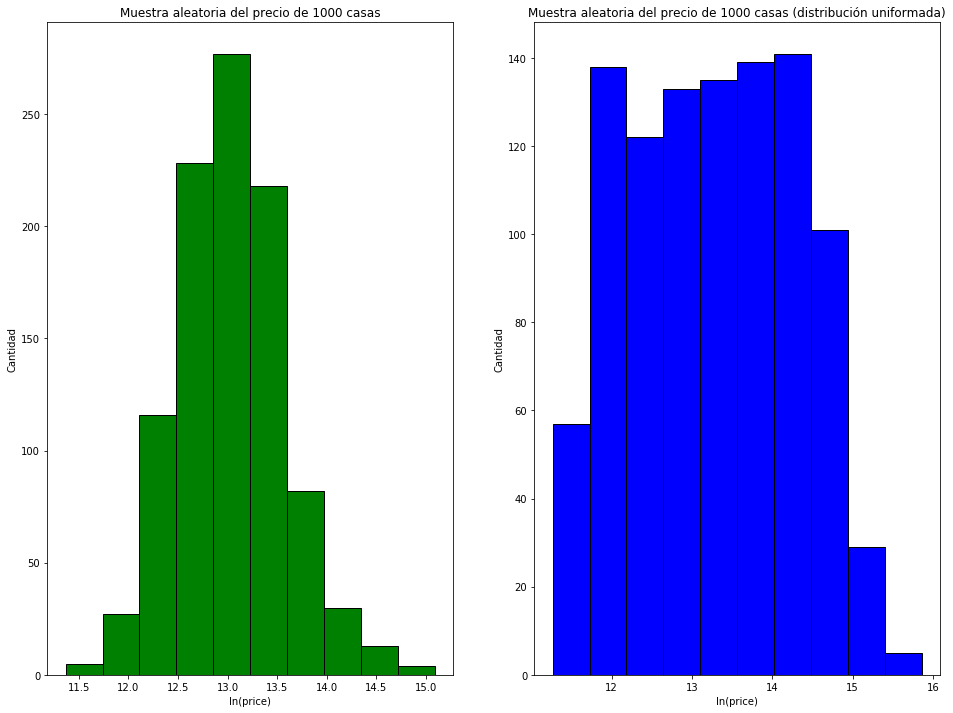

In [133]:
fig = plt.figure(figsize=(16,12))

plt.subplot(1,2,1)
ax = plt.gca()
ax.hist(df_A['price'], edgecolor='black', facecolor='green')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Muestra aleatoria del precio de 1000 casas')

plt.subplot(1,2,2)
ax = plt.gca()
ax.hist(df_B['price'],edgecolor='black', facecolor='blue')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Muestra aleatoria del precio de 1000 casas (distribución uniformada)')

plt.show()

##### a. Hold out validation

Creación de los conjuntos de entrenamiento y validación para los dos muestras:

In [97]:
from sklearn.model_selection import train_test_split

X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price

Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

Se grafican las dos muestras de entrenamiento y validación:

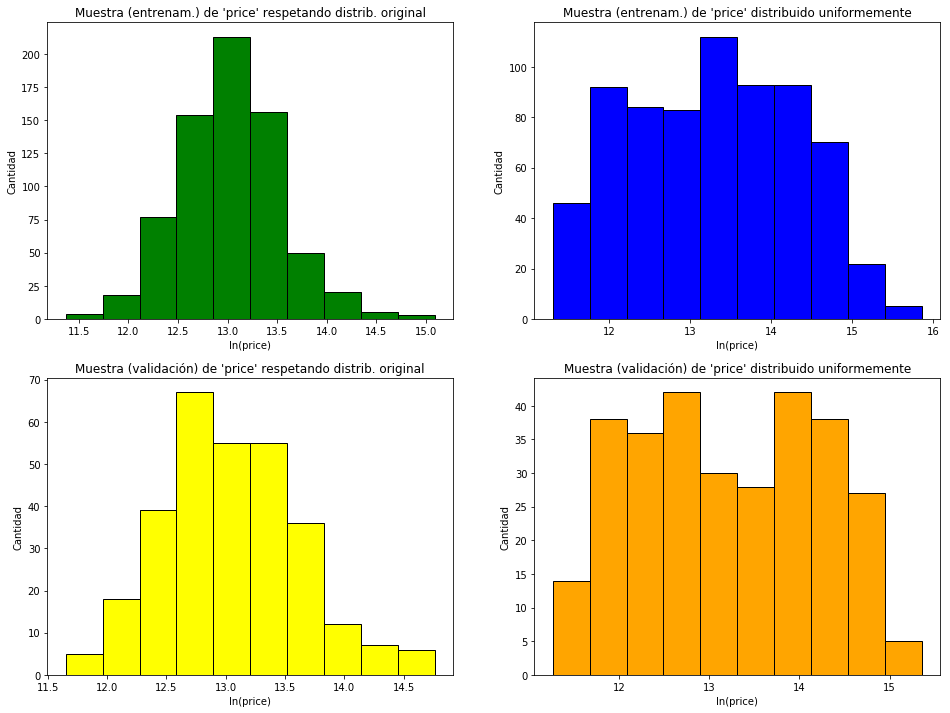

In [138]:
fig = plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
ax = plt.gca()
ax.hist(ytrain_A, bins=10, edgecolor='black', facecolor='green')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Muestra (entrenam.) de \'price\' respetando distrib. original')

plt.subplot(2,2,2)
ax = plt.gca()
ax.hist(ytrain_B, bins=10, edgecolor='black', facecolor='blue')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Muestra (entrenam.) de \'price\' distribuido uniformemente')

plt.subplot(2,2,3)
ax = plt.gca()
ax.hist(yval_A, bins=10, edgecolor='black', facecolor='yellow')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Muestra (validación) de \'price\' respetando distrib. original')

plt.subplot(2,2,4)
ax = plt.gca()
ax.hist(yval_B, bins=10, edgecolor='black', facecolor='orange')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Muestra (validación) de \'price\' distribuido uniformemente')

plt.show()

##### b. Error de cada modelo sobre ambos conjuntos de validación (A y B)

In [99]:
linreg_normal = lm.LinearRegression(fit_intercept = True)
linreg_normal.fit(Xtrain_A, ytrain_A)
linreg_normal.coef_.reshape(-1,1)

array([[-0.01278691],
       [ 0.02417835],
       [ 0.07871913],
       [ 0.02429581],
       [ 0.04391681],
       [ 0.05401337],
       [ 0.03983533],
       [ 0.04109056],
       [ 0.17441961],
       [ 0.06616019],
       [ 0.03956892],
       [-0.0678874 ],
       [ 0.00893331],
       [ 0.20167965],
       [-0.02663933],
       [ 0.08079085],
       [-0.01104891]])

In [102]:
linreg_uniforme = lm.LinearRegression(fit_intercept = True)
linreg_uniforme.fit(Xtrain_B, ytrain_B)
linreg_uniforme.coef_.reshape(-1,1)

array([[ 0.05640984],
       [ 0.06825125],
       [ 0.03677994],
       [ 0.0067651 ],
       [ 0.0408871 ],
       [ 0.03282576],
       [ 0.04521668],
       [ 0.06609639],
       [ 0.21820585],
       [ 0.0273602 ],
       [ 0.02513351],
       [-0.05490685],
       [ 0.03536164],
       [ 0.23871922],
       [-0.04508584],
       [ 0.12762935],
       [ 0.00292616]])

A continuación, se predice sobre el conjunto de validación (y entrenamiento):

In [135]:
yhat_train_normal = linreg_normal.predict(Xtrain_A)
yhat_train_uniforme = linreg_uniforme.predict(Xtrain_B)
yhat_val_normal = linreg_normal.predict(Xval_A)
yhat_val_uniforme = linreg_uniforme.predict(Xval_B)

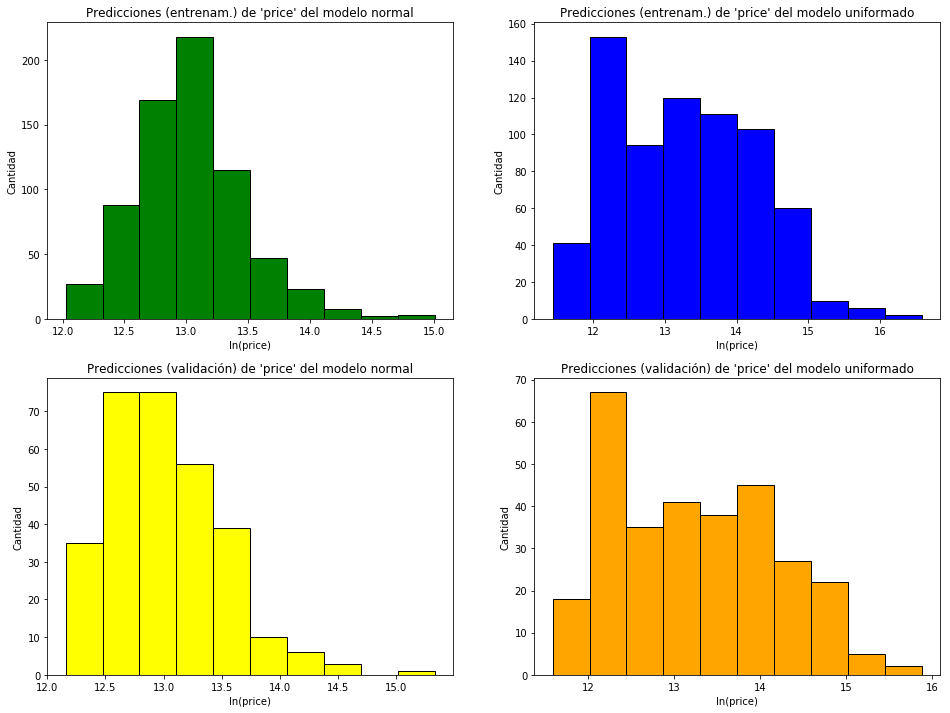

In [140]:
fig = plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
ax = plt.gca()
ax.hist(yhat_train_normal, bins=10, edgecolor='black', facecolor='green')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Predicciones (entrenam.) de \'price\' del modelo normal')

plt.subplot(2,2,2)
ax = plt.gca()
ax.hist(yhat_train_uniforme, bins=10, edgecolor='black', facecolor='blue')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Predicciones (entrenam.) de \'price\' del modelo uniformado')

plt.subplot(2,2,3)
ax = plt.gca()
ax.hist(yhat_val_normal, bins=10, edgecolor='black', facecolor='yellow')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Predicciones (validación) de \'price\' del modelo normal')

plt.subplot(2,2,4)
ax = plt.gca()
ax.hist(yhat_val_uniforme, bins=10, edgecolor='black', facecolor='orange')
plt.xlabel('ln(price)')
plt.ylabel('Cantidad')
plt.title('Predicciones (validación) de \'price\' del modelo uniformado')

plt.show()

In [136]:
train_mse_A = np.mean(np.power(ytrain_A - yhat_train_normal, 2))
train_mse_B = np.mean(np.power(ytrain_B - yhat_train_uniforme, 2))
val_mse_A = np.mean(np.power(yval_A - yhat_val_normal, 2))
val_mse_B = np.mean(np.power(yval_B - yhat_val_uniforme, 2))
print('MSE de entrenamiento/validacion de la muestra normal: %.5f/%.5f' % (train_mse_A, val_mse_A))
print('MSE de entrenamiento/validacion de la muestra uniformada: %.5f/%.5f' % (train_mse_B, val_mse_B))

MSE de entrenamiento/validacion de la muestra normal: 0.06531/0.07161
MSE de entrenamiento/validacion de la muestra uniformada: 0.11543/0.11896


##### c. Elección de uno de los modelos anteriores

La elección de un modelo sobre otro dependerá de cómo se espera que se comporte la información futura. Si se tiene la suficiente certeza de que los datos a predecir ('price') se distribuirán de la misma forma en que lo hace el dataset actual (misma media y varianza), entonces conviene usar el modelo entrenado con la muestra que pertenece a dicha distribución, pues ya ha aprendido a ponderar los atributos para realizar una predicción lo más similar a la distribución descrita por la muestra.

En cambio, si no se sabe cómo se distribuirá la información entrante futura, entonces podría ser conveniente utilizar el modelo entrenado con una cantidad equitativa de datos pertenecientes a cada rango de precio. Este modelo, si bien no logró ajustarse a su distribución como lo hizo el primero, sí tendrá mayor capacidad para adaptarse a nuevos comportamientos en los datos futuros, ya que no se encontrará sobreajustado a comportamientos marcados como lo son la distribución normal de las salidas esperadas.